In [3]:
%load_ext autoreload
%autoreload 2

In [8]:
import dynadojo as dd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

(30, 30)


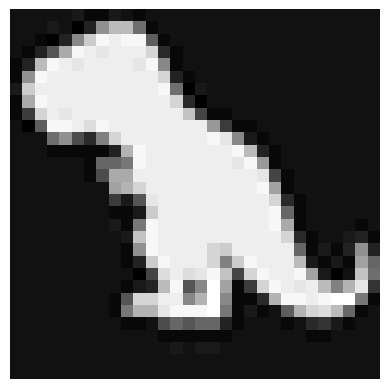

In [26]:
def grayscale(png_path, basewidth=30):    
    image = Image.open(png_path)
    wpercent = (basewidth / float(image.size[0]))
    hsize = int((float(image.size[1]) * float(wpercent)))
    image = image.resize((basewidth,hsize), Image.Resampling.LANCZOS)
    grayscale_image = image.convert("L")
    grey = np.array(grayscale_image)
    return grey

dino = grayscale("../graphics/dino.png")
print(dino.shape)
latent_dim = dino.shape[0] ** 2
plt.imshow(dino, cmap='gray')
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [43]:
x0 = np.expand_dims(dino.flatten()[::-1], axis=0)
x0[x0 > 30] += 20
print(x0.shape)

(1, 900)


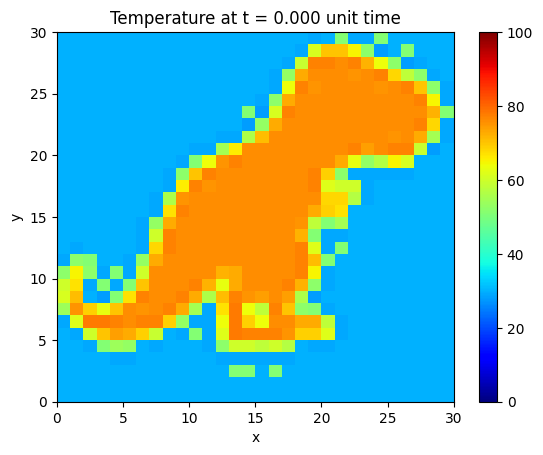

In [45]:
n = 1
timesteps = 20
embed_dim = latent_dim
system = dd.systems.HeatEquation(latent_dim, embed_dim, noise_scale=0)
x = system.make_data_wrapper(x0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
dd.utils.heat.plot(x[0], timesteps, system.dt, savefile="../graphics/hot_dino.gif")